In [1]:
import xarray as xr
import numpy as np
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the bounding box for Germany
LAT_MIN, LAT_MAX = 47, 55  # Latitude range for Germany
LON_MIN, LON_MAX = 5, 15   # Longitude range for Germany

DATA_FOLDER = "last-40-years-data"  # Folder where .nc files are stored

def load_and_filter_precipitation(nc_files):
    """Loads precipitation data from NetCDF files and filters for Germany."""
    all_data = []
    
    for nc_file in nc_files:
        print(f"Processing: {nc_file}")  # Debug print
        ds = xr.open_dataset(nc_file)
        
        # Print dataset dimensions for debugging
        print(f"Dataset dimensions: {ds.dims}")
        print(f"Dataset variables: {list(ds.variables)}")
        
        # Ensure the dataset contains the 'precip' variable
        if 'precip' not in ds:
            print(f"Warning: 'precip' variable not found in {nc_file}")
            continue
        
        precip = ds['precip']
        
        # Adjusting for correct coordinate names
        lat_name = "lat" if "lat" in ds.dims else "latitude"
        lon_name = "lon" if "lon" in ds.dims else "longitude"
        
        # Filter for Germany's latitude & longitude
        precip_germany = precip.sel(**{
            lat_name: slice(LAT_MAX, LAT_MIN),
            lon_name: slice(LON_MIN, LON_MAX)
        })
        
        # Convert to DataFrame and store
        df = precip_germany.to_dataframe().reset_index()
        if df.empty:
            print(f"Warning: No data for Germany in {nc_file}")
        else:
            all_data.append(df)
    
    return all_data

# Step 1: Get the list of NetCDF files
nc_files = glob.glob(os.path.join(DATA_FOLDER, "*.nc"))
if not nc_files:
    print(f"Error: No NetCDF files found in {DATA_FOLDER}")
else:
    print(f"Found {len(nc_files)} NetCDF files.")

# Step 2: Load & filter precipitation data for Germany
data_frames = load_and_filter_precipitation(nc_files)

Found 4 NetCDF files.
Processing: last-40-years-data\full_data_monthly_v2022_1981_1990_025.nc
Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lon': 1440, 'lat': 720, 'time': 120})
Dataset variables: ['lon', 'lat', 'time', 'precip', 'numgauge', 'infilled_numgauges', 'interpolation_error', 'interpolation_error_infilled', 'diff_new_old_method']
Processing: last-40-years-data\full_data_monthly_v2022_1991_2000_025.nc
Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lon': 1440, 'lat': 720, 'time': 120})
Dataset variables: ['lon', 'lat', 'time', 'precip', 'numgauge', 'infilled_numgauges', 'interpolation_error', 'interpolation_error_infilled', 'diff_new_old_method']
Processing: last-40-years-data\full_data_monthly_v2022_2001_2010_025.nc
Dataset dimensions: FrozenMappingWarningOnValuesAccess({'lon': 1440, 'lat': 720, 'time': 120})
Dataset variables: ['lon', 'lat', 'time', 'precip', 'numgauge', 'infilled_numgauges', 'interpolation_error', 'interpolation_error_infilled', 'diff_ne

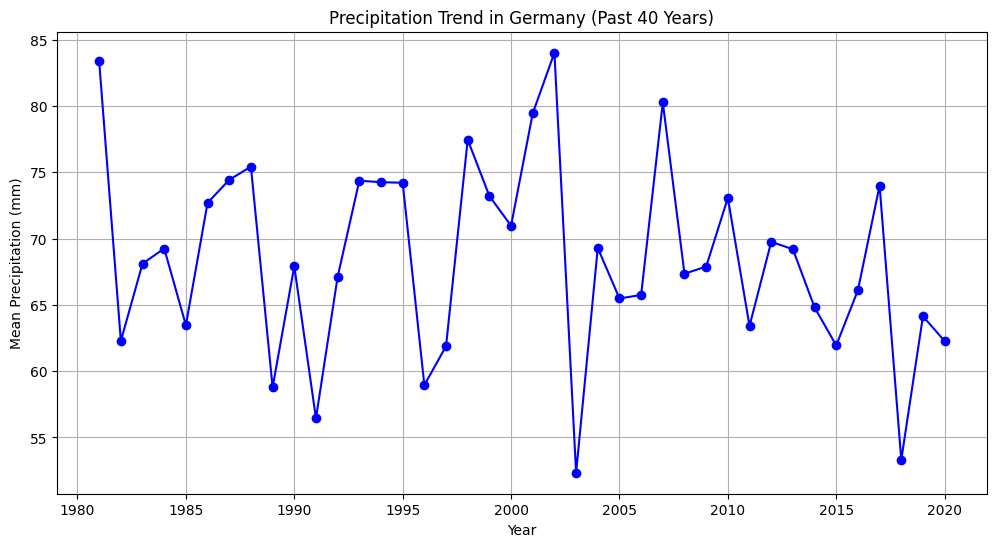

In [2]:
"""Analyzes and visualizes precipitation trends over 40 years."""
df_all = pd.concat(data_frames)
df_all['time'] = pd.to_datetime(df_all['time'])
    
    # Compute yearly mean precipitation for Germany
yearly_precip = df_all.groupby(df_all['time'].dt.year)['precip'].mean()
    
    # Plot the precipitation trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_precip.index, yearly_precip.values, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Mean Precipitation (mm)')
plt.title('Precipitation Trend in Germany (Past 40 Years)')
plt.grid()
plt.show()

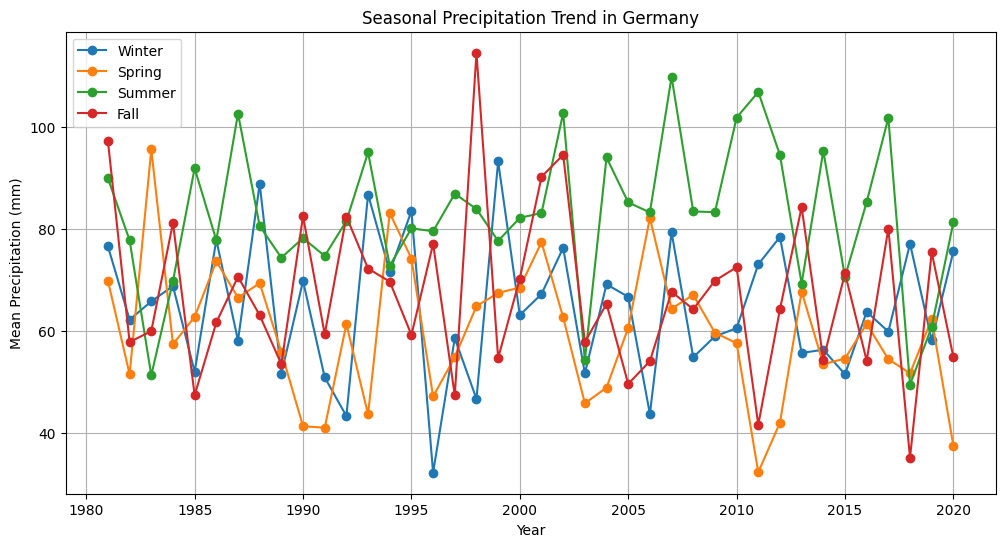

In [3]:
"""Analyzes and visualizes seasonal precipitation trends."""

df_all = pd.concat(data_frames)
df_all['time'] = pd.to_datetime(df_all['time'])
    
# Define seasons mapping
seasons = {
    12: "Winter", 1: "Winter", 2: "Winter",
    3: "Spring", 4: "Spring", 5: "Spring",
    6: "Summer", 7: "Summer", 8: "Summer",
    9: "Fall", 10: "Fall", 11: "Fall"
}
    
df_all["season"] = df_all["time"].dt.month.map(seasons)
    
# Compute seasonal mean precipitation for Germany
seasonal_precip = df_all.groupby([df_all['time'].dt.year, "season"])['precip'].mean().unstack()

# Plot the seasonal precipitation trends
plt.figure(figsize=(12, 6))
for season in ["Winter", "Spring", "Summer", "Fall"]:
    if season in seasonal_precip.columns:
        plt.plot(seasonal_precip.index, seasonal_precip[season], marker='o', linestyle='-', label=season)

plt.xlabel('Year')
plt.ylabel('Mean Precipitation (mm)')
plt.title('Seasonal Precipitation Trend in Germany')
plt.legend()
plt.grid()
plt.show()